# Controler une créature Poppy

Différentes créatures:
* humanoid
* torso
* ergo
* ...

In [1]:
from poppy.creatures import PoppyHumanoid

poppy = PoppyHumanoid()

On peut donner des positions de base:
* debout
* assis

In [2]:
poppy.stand_position.start()

Les valeurs des moteurs hardware sont automatiquement synchronisées (à 50Hz) avec les valeurs de l'objet (R/W).

On peut récupérer la liste des moteurs, lire les différents registres des servo-moteurs:

In [3]:
poppy.motors

[<DxlMotor name=abs_y id=31 pos=-1.98>,
 <DxlMotor name=abs_x id=32 pos=-0.22>,
 <DxlMotor name=abs_z id=33 pos=-0.31>,
 <DxlMotor name=bust_y id=34 pos=-0.57>,
 <DxlMotor name=bust_x id=35 pos=-0.13>,
 <DxlMotor name=head_z id=36 pos=-0.44>,
 <DxlMotor name=head_y id=37 pos=0.67>,
 <DxlMotor name=l_shoulder_y id=41 pos=9.21>,
 <DxlMotor name=l_shoulder_x id=42 pos=19.71>,
 <DxlMotor name=l_arm_z id=43 pos=0.04>,
 <DxlMotor name=l_elbow_y id=44 pos=-20.26>,
 <DxlMotor name=r_shoulder_y id=51 pos=10.18>,
 <DxlMotor name=r_shoulder_x id=52 pos=-20.33>,
 <DxlMotor name=r_arm_z id=53 pos=0.48>,
 <DxlMotor name=r_elbow_y id=54 pos=-20.0>,
 <DxlMotor name=l_hip_x id=11 pos=2.59>,
 <DxlMotor name=l_hip_z id=12 pos=2.51>,
 <DxlMotor name=l_hip_y id=13 pos=-0.46>,
 <DxlMotor name=l_knee_y id=14 pos=0.22>,
 <DxlMotor name=l_ankle_y id=15 pos=-6.46>,
 <DxlMotor name=r_hip_x id=21 pos=1.8>,
 <DxlMotor name=r_hip_z id=22 pos=-1.8>,
 <DxlMotor name=r_hip_y id=23 pos=1.01>,
 <DxlMotor name=r_knee_y i

In [4]:
poppy.head_z.present_position

-0.44

In [5]:
poppy.head_z.present_load

0.0

In [6]:
{m.name: m.present_position for m in poppy.motors}

{u'abs_x': 0.13,
 u'abs_y': -1.98,
 u'abs_z': 0.04,
 u'bust_x': -0.04,
 u'bust_y': -0.57,
 u'head_y': 0.6700000000000017,
 u'head_z': 0.15,
 u'l_ankle_y': -6.99,
 u'l_arm_z': 0.04,
 u'l_elbow_y': -20.18,
 u'l_hip_x': 2.33,
 u'l_hip_y': -0.1100000000000001,
 u'l_hip_z': 2.42,
 u'l_knee_y': 0.66,
 u'l_shoulder_x': 19.89,
 u'l_shoulder_y': 9.739999999999995,
 u'r_ankle_y': -7.69,
 u'r_arm_z': 0.13,
 u'r_elbow_y': -20.0,
 u'r_hip_x': 1.71,
 u'r_hip_y': 0.57,
 u'r_hip_z': -1.8,
 u'r_knee_y': 0.84,
 u'r_shoulder_x': -20.33,
 u'r_shoulder_y': 10.090000000000003}

De la même manière on peut écrire dans ces registres:

In [7]:
poppy.head_z.goal_position = 30

In [8]:
poppy.head_z.goal_position = -30

In [9]:
import time

from numpy import sin

amp = 30
freq = 0.5

t0 = time.time()

while time.time() - t0 < 10:
    t = time.time()
    pos = amp * sin(2 * 3.14 * freq * t)
    
    poppy.head_z.goal_position = pos
    
    time.sleep(0.02)

## Primitives

In [10]:
from pypot.primitive.utils import Sinus

s1 = Sinus(poppy, 50., [poppy.head_z, poppy.head_y], amp=20, freq=0.5)

In [11]:
s1.start()

In [12]:
s2 = Sinus(poppy, 50., [poppy.head_z, ], amp=5, freq=0.75)

In [13]:
s2.start()

In [14]:
pos = []

t0 = time.time()
while time.time() - t0 < 10:
    pos.append(poppy.head_z.present_position)
    time.sleep(0.1)
    
s1.stop()
s2.stop()

Populating the interactive namespace from numpy and matplotlib


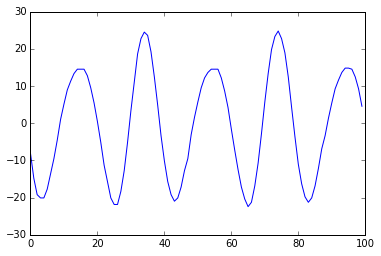

In [16]:
%pylab inline

plot(pos)

## Pareil en V-REP

http://localhost:8888/notebooks/Desktop/TTFX-VREP.ipynb

## Utilisation de SNAP

Via un serveur web et accès à travers une REST API.

In [1]:
from poppy.creatures import PoppyHumanoid

poppy = PoppyHumanoid(simulator='vrep')

In [ ]:
from pypot.server.snap import SnapRobotServer

snap_server = SnapRobotServer(poppy, '0.0.0.0', 8080)
snap_server.run()

http://snap.berkeley.edu/snapsource/snap.html#open:http://poppy-humanoid.local:8080/snap-blocks.xml

## Apprentissage autonome: [Explauto](https://github.com/flowersteam/explauto)

In [1]:
from IPython.display import VimeoVideo

VimeoVideo(95405850)